In [10]:
import numpy as np
from pathlib import Path
import json

data_dir = Path("../data/processed")   # adjust if notebook is in repo root

X_train = np.load(data_dir / "X_train.npy")
y_train = np.load(data_dir / "y_train.npy")
X_val   = np.load(data_dir / "X_val.npy")
y_val   = np.load(data_dir / "y_val.npy")
X_test  = np.load(data_dir / "X_test.npy")
y_test  = np.load(data_dir / "y_test.npy")

lam = np.load(data_dir / "wavelength_axis.npy")

with open(data_dir / "metadata.json", "r") as f:
    meta = json.load(f)

class_index_to_name = {int(k): v for k, v in meta["class_index_to_name"].items()}

X_train.shape, y_train.shape


((7000, 512), (7000,))

In [11]:
from collections import Counter

print("Train:", Counter(y_train))
print("Val:  ", Counter(y_val))
print("Test: ", Counter(y_test))

class_index_to_name


Train: Counter({np.int64(4): 1407, np.int64(2): 1406, np.int64(0): 1400, np.int64(1): 1397, np.int64(3): 1390})
Val:   Counter({np.int64(2): 322, np.int64(1): 300, np.int64(3): 294, np.int64(4): 293, np.int64(0): 291})
Test:  Counter({np.int64(3): 316, np.int64(0): 309, np.int64(1): 303, np.int64(4): 300, np.int64(2): 272})


{0: 'stable_single_mode',
 1: 'mode_hop',
 2: 'clipped',
 3: 'high_noise',
 4: 'multi_mode'}

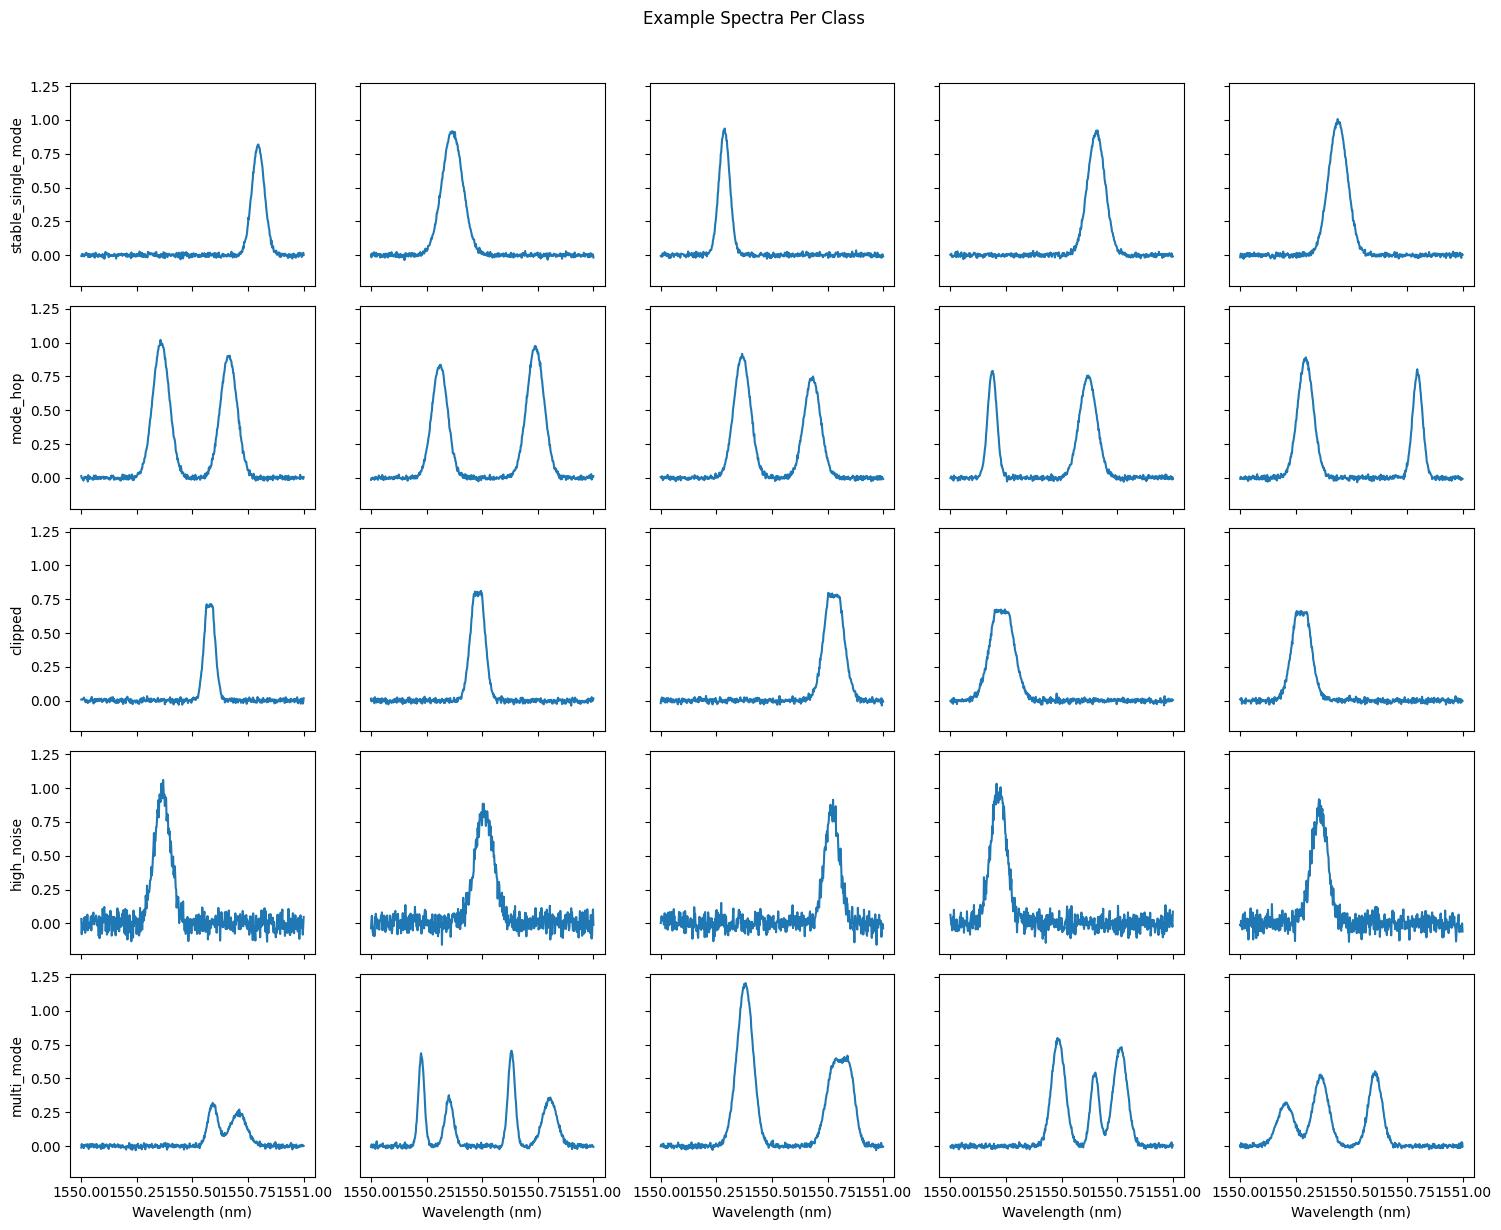

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_examples_per_class(X, y, lam, class_index_to_name, n_per_class=5):
    num_classes = len(class_index_to_name)
    fig, axes = plt.subplots(num_classes, n_per_class, figsize=(3*n_per_class, 2.5*num_classes), sharex=True, sharey=True)

    if num_classes == 1:
        axes = np.expand_dims(axes, axis=0)

    for class_idx in range(num_classes):
        class_name = class_index_to_name[class_idx]
        mask = (y == class_idx)
        idxs = np.where(mask)[0]
        chosen = np.random.choice(idxs, size=n_per_class, replace=False)

        for j, ix in enumerate(chosen):
            ax = axes[class_idx, j]
            ax.plot(lam, X[ix])
            if j == 0:
                ax.set_ylabel(class_name)
            if class_idx == num_classes - 1:
                ax.set_xlabel("Wavelength (nm)")

    plt.suptitle("Example Spectra Per Class")
    plt.tight_layout(rect=[0,0,1,0.96])
    fig_path = Path("../reports/figures/example_spectra.png")
    plt.savefig(fig_path, dpi=200, bbox_inches="tight")
    plt.show()

plot_examples_per_class(X_train, y_train, lam, class_index_to_name, n_per_class=5)


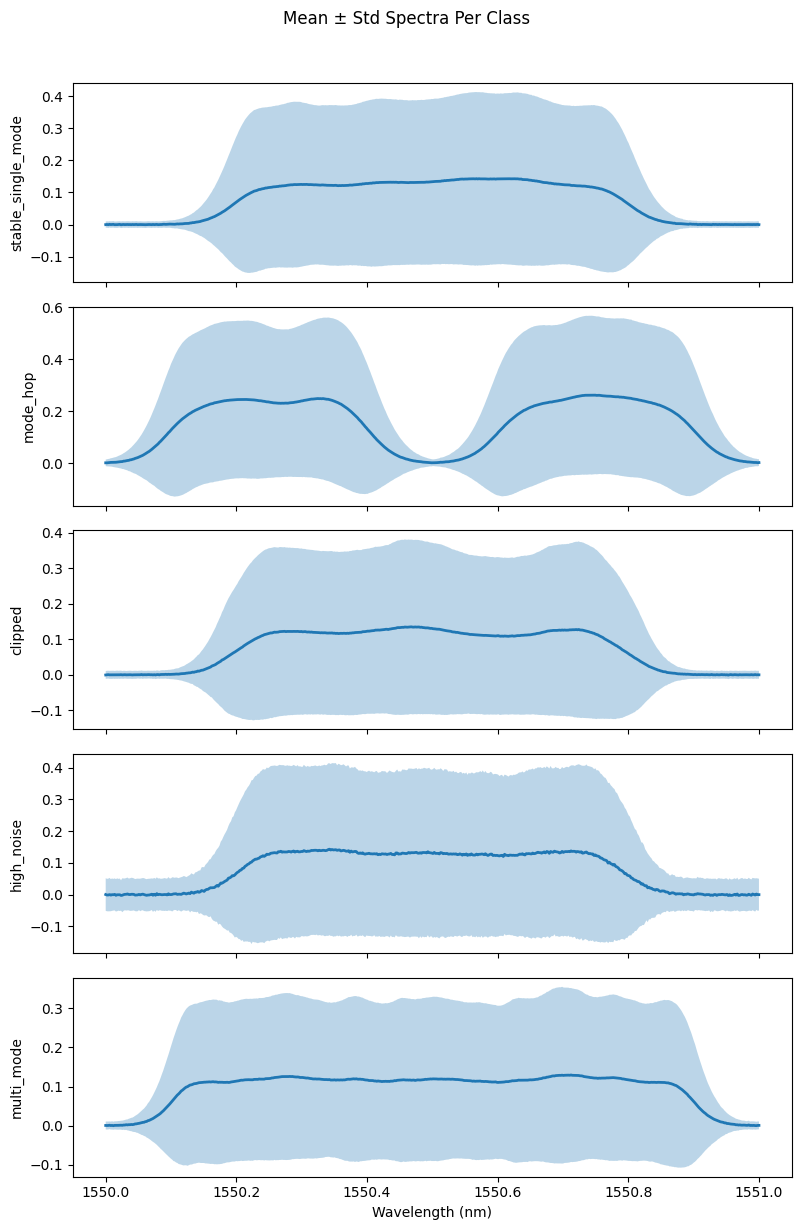

In [16]:
def plot_mean_std_per_class(X, y, lam, class_index_to_name):
    num_classes = len(class_index_to_name)
    fig, axes = plt.subplots(num_classes, 1, figsize=(8, 2.5 * num_classes), sharex=True)

    for class_idx in range(num_classes):
        name = class_index_to_name[class_idx]
        mask = (y == class_idx)
        Xc = X[mask]

        mean = Xc.mean(axis=0)
        std  = Xc.std(axis=0)

        ax = axes[class_idx]
        ax.plot(lam, mean, linewidth=2, label=f"{name} mean")
        ax.fill_between(lam, mean - std, mean + std, alpha=0.3)
        ax.set_ylabel(name)

    axes[-1].set_xlabel("Wavelength (nm)")
    plt.suptitle("Mean ± Std Spectra Per Class")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig_path = Path("../reports/figures/mean_std_spectra_per_class.png")
    plt.savefig(fig_path, dpi=200, bbox_inches="tight")
    plt.show()

plot_mean_std_per_class(X_train, y_train, lam, class_index_to_name)


<Figure size 640x480 with 0 Axes>